In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures, Binarizer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, SGDRegressor, ElasticNetCV, LassoLars
from sklearn.svm import LinearSVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
%matplotlib inline
sns.set(color_codes=True)

In [4]:
df_train = pd.read_csv('PredictUpVoteCount/train_NIR5Yl1.csv')
#df_train = df_train.drop(df_train[df_train.Views > 3000000].index)
df_train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [5]:
pp.ProfileReport(df_train)

In [37]:
df_train['Tag'].value_counts()

c    72458
j    72224
p    43407
i    32400
a    31692
s    23322
h    20563
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

In [38]:
df_train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

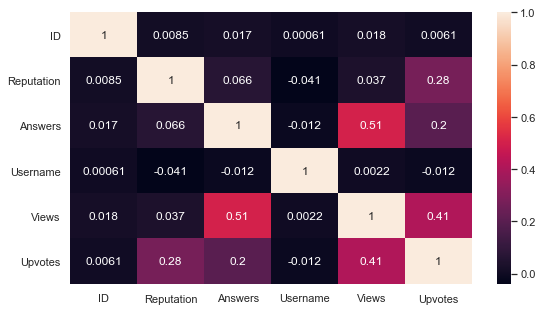

In [39]:
correlations = df_train.corr()
plt.figure(figsize = (9,5))
sns.heatmap(correlations, annot=True)

In [40]:
df = df_train.copy()

In [41]:
LblEncoder = LabelEncoder()
df['Tag'] = LblEncoder.fit_transform(df['Tag'])

In [42]:
df['Tag'].value_counts()

1    72458
4    72224
6    43407
3    32400
0    31692
8    23322
2    20563
5    14546
7    12442
9     6978
Name: Tag, dtype: int64

In [9]:
np.max(df['Views'])

2969255.0

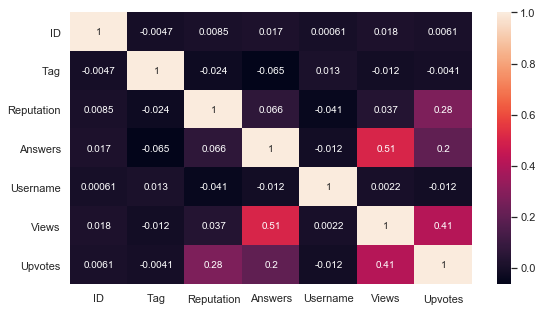

In [10]:
correlations = df.corr()
plt.figure(figsize = (9,5))
sns.heatmap(correlations, annot=True)

In [11]:
df_reduced = df.drop(columns=['ID','Username'],axis=1)
df_reduced.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [12]:
df_reduced.describe()

,Tag,Reputation,Answers,Views,Upvotes
count,330032.000000,3.300320e+05,330032.000000,3.300320e+05,330032.000000
mean,3.543062,7.772517e+03,3.916623,2.949654e+04,333.493285
std,2.493932,2.706139e+04,3.574375,7.727360e+04,3453.684456
min,0.000000,0.000000e+00,0.000000,9.000000e+00,0.000000
25%,1.000000,2.810000e+02,2.000000,2.593000e+03,8.000000
50%,4.000000,1.235000e+03,3.000000,8.953000e+03,28.000000
75%,6.000000,5.116250e+03,5.000000,2.686900e+04,107.000000
max,9.000000,1.042428e+06,76.000000,2.969255e+06,615278.000000


C:\Users\msdaw\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


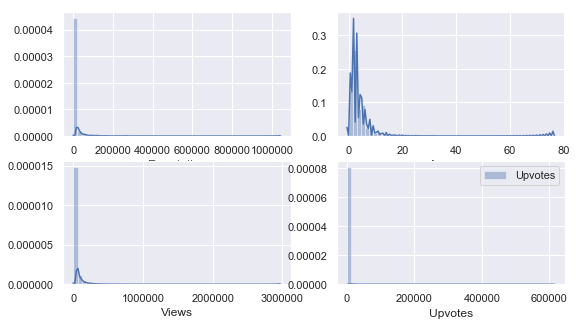

In [13]:
plt.figure(figsize = (9,5))
plt.subplot(2,2,1)
sns.distplot(df['Reputation'],label='Reputation')
plt.subplot(2,2,2)
sns.distplot(df['Answers'],label='Answers')
plt.subplot(2,2,3)
sns.distplot(df['Views'],label='Views')
plt.subplot(2,2,4)
sns.distplot(df['Upvotes'],label='Upvotes')
plt.legend()
plt.show()

<Figure size 3600x3600 with 0 Axes>

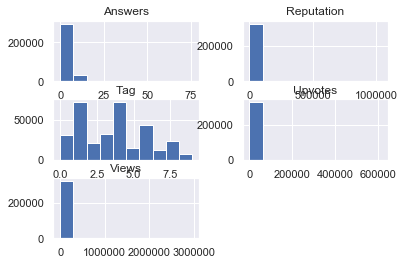

In [14]:
plt.figure(figsize = (50,50))
df_reduced.hist()
plt.show()

In [15]:
bn = Binarizer(threshold=7)
pd_watched = bn.transform([df_reduced['Answers']])[0]
df_reduced['pd_watched'] = pd_watched

In [16]:
df_reduced.shape

(330032, 6)

In [17]:
target = df_reduced['Upvotes']
featurenames = ['Tag','Reputation','Answers','Views','pd_watched']

In [18]:
X_train,X_val,y_train,y_val = train_test_split(df_reduced[featurenames],target,test_size=0.22,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.22,random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\msdaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\msdaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [20]:
randmodel = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgbr = xgb.XGBRegressor()
lasso = LassoLars(alpha=0.021,max_iter=150)

In [21]:
def root_mean_square_error(model,predictedval,actualval):
    print(model + ' Value ',np.sqrt(mean_squared_error(predictedval, actualval)))
    print(model + ' r2_score ',r2_score(predictedval,actualval))
    return np.sqrt(mean_squared_error(predictedval, actualval))

In [22]:
randmodel.fit(X_train,y_train)
gbr.fit(X_train,y_train)
xgbr.fit(X_train,y_train)

y_pred1 = randmodel.predict(X_val)
y_test_pred1 = randmodel.predict(X_test)
root_mean_square_error('RandomForestRegressor',y_pred1,y_val)

y_pred2 = gbr.predict(X_val)
y_test_pred2 = gbr.predict(X_test)
root_mean_square_error('GradientBoostingRegressor',y_pred2,y_val)

y_pred3 = xgbr.predict(X_val)
y_test_pred3 = xgbr.predict(X_test)
root_mean_square_error('XGBoostRegressor',y_pred3,y_val)

C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msdaw\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomForestRegressor Value  1198.595773592517
RandomForestRegressor r2_score  0.8649469098840374
GradientBoostingRegressor Value  1138.6323519557002
GradientBoostingRegressor r2_score  0.902312767284514
XGBoostRegressor Value  1179.621754931847
XGBoostRegressor r2_score  0.8914017650355001


1179.621754931847

In [23]:
stacked_val_preds = np.column_stack((y_pred1,y_pred2,y_pred3))
stacked_test_preds = np.column_stack((y_test_pred1,y_test_pred2,y_test_pred3))

# print(stacked_val_preds)
# print('--'*50)
# print(stacked_test_preds)

meta_model = LinearRegression()
meta_model.fit(stacked_val_preds,y_val)
Final_predictions = meta_model.predict(stacked_test_preds)
root_mean_square_error('MetalModel',Final_predictions,y_test)

MetalModel Value  915.7182743642483
MetalModel r2_score  0.8720455174396942


915.7182743642483

#### This is an example of under-fitting. to over come under-fitting, we need to increase the complexity of model

In [24]:
poly = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
x_train_poly = poly.fit_transform(X_train)
x_val_poly = poly.fit_transform(X_val)
x_test_poly = poly.fit_transform(X_test)

In [25]:
randmodel = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgbr = xgb.XGBRegressor()

In [26]:
randmodel.fit(x_train_poly,y_train)
gbr.fit(x_train_poly,y_train)
xgbr.fit(x_train_poly,y_train)

y_pred1 = randmodel.predict(x_val_poly)
y_test_pred1 = randmodel.predict(x_test_poly)
root_mean_square_error('RandomForestRegressor',y_pred1,y_val)

y_pred2 = gbr.predict(x_val_poly)
y_test_pred2 = gbr.predict(x_test_poly)
root_mean_square_error('GradientBoostingRegressor',y_pred2,y_val)

y_pred3 = xgbr.predict(x_val_poly)
y_test_pred3 = xgbr.predict(x_test_poly)
root_mean_square_error('XGBoostRegressor',y_pred3,y_val)

stacked_val_preds = np.column_stack((y_pred1,y_pred2,y_pred3))
stacked_test_preds = np.column_stack((y_test_pred1,y_test_pred2,y_test_pred3))

print(stacked_val_preds)
print('--'*50)
print(stacked_test_preds)

meta_model = LinearRegression()
meta_model.fit(stacked_val_preds,y_val)
Final_predictions = meta_model.predict(stacked_test_preds)
root_mean_square_error('MetalModel',Final_predictions,y_test)

C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msdaw\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomForestRegressor Value  1326.6403414158053
RandomForestRegressor r2_score  0.8584065372181829
GradientBoostingRegressor Value  1245.9908712120969
GradientBoostingRegressor r2_score  0.8998680904052235
XGBoostRegressor Value  1374.664501546099
XGBoostRegressor r2_score  0.8626107343109235
[[  3.1         26.81379367  26.26819992]
 [229.1        295.39691502 292.84899902]
 [ 30.2         34.1703131   30.95513153]
 ...
 [ 17.6         44.74742262  30.95513153]
 [ 11.6         26.81379367  26.26819992]
 [ 26.5         89.57665325  90.73030853]]
----------------------------------------------------------------------------------------------------
[[ 15.9         55.46739224  60.45521164]
 [834.1        617.58795591 644.50860596]
 [ 50.5         26.81379367  26.26819992]
 ...
 [ 43.2         53.57705324  80.98777771]
 [ 66.1         34.1703131   30.95513153]
 [  4.8         26.81379367  26.26819992]]
MetalModel Value  888.535388536507
MetalModel r2_score  0.8574531215607442


888.535388536507

In [140]:
#df_test = pd.read_csv('PredictUpVoteCount/test_8i3B3FC.csv')
#df_submission_sample = pd.read_csv('PredictUpVoteCount/sample_submission_OR5kZa5.csv')
#df_submission_sample.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


In [27]:
df_test = pd.read_csv('PredictUpVoteCount/test_8i3B3FC.csv')
ids = df_test['ID']
df_test.drop(['ID','Username'], axis=1,inplace =True)

labelencoder_X = LabelEncoder()
df_test['Tag'] = labelencoder_X.fit_transform(df_test['Tag'])

bn = Binarizer(threshold=7)
pd_watched = bn.transform([df_test['Answers']])[0]
df_test['pd_watched'] = pd_watched

df_test = scaler.fit_transform(df_test)
df_test_poly = poly.fit_transform(df_test)

y_pred1 = randmodel.predict(df_test_poly)
y_pred2 = gbr.predict(df_test_poly)
y_pred3 = xgbr.predict(df_test_poly)

stacked_Final_preds = np.column_stack((y_pred1,y_pred2,y_pred3))
pred_test = meta_model.predict(stacked_Final_preds)
#pred_test=abs(pred_test)

C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
print(pred_test.shape)
df_test.shape

(141448,)


(141448, 5)

In [32]:
pred_test=abs(pred_test)

In [33]:
submission = pd.DataFrame({'ID': ids,
                           'Upvotes':pred_test
                           })

submission.to_csv("final_sub2.csv",index=False)